In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats

df = pd.read_csv("winequality-red.csv")


# Red Wine Quality

## Data details

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


## Project goals

- Describe the dataset. Understand and document clearly what each variable in the dataset measures. - Describe how and when the data was collated, what is the sample size, and any other important detail.
- Formulate at least one specific hypothesis (e.g. “fixed acidity of wine has a negative impact on perceived wine quality”). Also state the corresponding null hypothesis.
- Perform EDA. Inspect variables separately, plot how they correlate with the independent variable and one another. Check for multicollinearity.
- Separate a random 20% of your dataset as a hold-out. Select variables and their transformations for your model. Provide arguments for why those variables were chosen and which transformations were applied.
- Fit the model using statsmodels. Print out the model summary and provide a written interpretation of key model fit statistics (such as R-squared) and coefficients. Explain which variables have the largest impact on the dependent variable, including their confidence intervals.
- Answer the hypothesis you stated in the beginning of the analysis.
- Inspect how the model performs on the hold out dataset.
- Provide suggestions for how your analysis could be improved.


## Dataset

Data description:
- fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides - the amount of salt in the wine
- free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density - the density of water is close to that of water depending on the percent alcohol and sugar content
- pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Hypotesis

Null hypotesis: Alcohol concentration in wine has no impact on perceived wine quality. <br>
Alternative hypotesis: Alcohol concentration in wine has an impact on perceived wine quality.

## Preparation

## EDA for training model data

Seperating quality column

In [2]:
X = df.drop(columns=["quality"]) 
y = df["quality"]       

Holding out 20% of data test model.

In [3]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.306489,0.528073,0.273878,2.543589,0.088934,16.127834,47.280688,0.996735,3.308585,0.663675,10.424446
std,1.695325,0.177710,0.194902,1.375697,0.050981,10.473562,33.334786,0.001852,0.151599,0.178360,1.065672
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.395000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,39.000000,0.996750,3.310000,0.620000,10.200000
75%,9.300000,0.635000,0.430000,2.600000,0.091000,22.000000,64.000000,0.997800,3.400000,0.740000,11.100000
max,15.900000,1.580000,1.000000,15.400000,0.611000,68.000000,289.000000,1.003690,3.900000,2.000000,14.900000


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 1542 to 1083
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


Data for modeling Sample size - 1279 lines and 11 columns.

<Axes: xlabel='quality', ylabel='Count'>

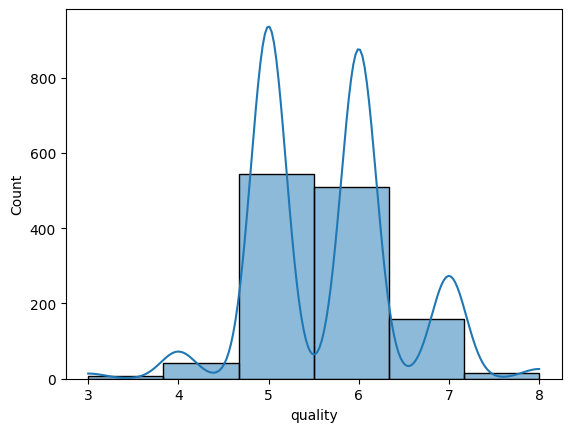

In [6]:
sns.histplot(y_train, bins=6, kde=True)

Quality score distribution represents that vines were evaluated scores from 3 to 8. For the further analysis qualyti will be splited in two catecories: not high and high.

In [7]:
print("Values >= 6:", (df['quality'] >= 6).sum())
print("Values < 6:", (df['quality'] < 6).sum())


Values >= 6: 855
Values < 6: 744


Quality will be splited in two groups: high quality and low quality. This division will result in two groups of approximately equal size.

In [8]:
X_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [9]:
X_train.duplicated().sum()

np.int64(158)

There are 158 ducplicating lines. We have not complete data, because due to unbiased evaluation names and other data were deleted.

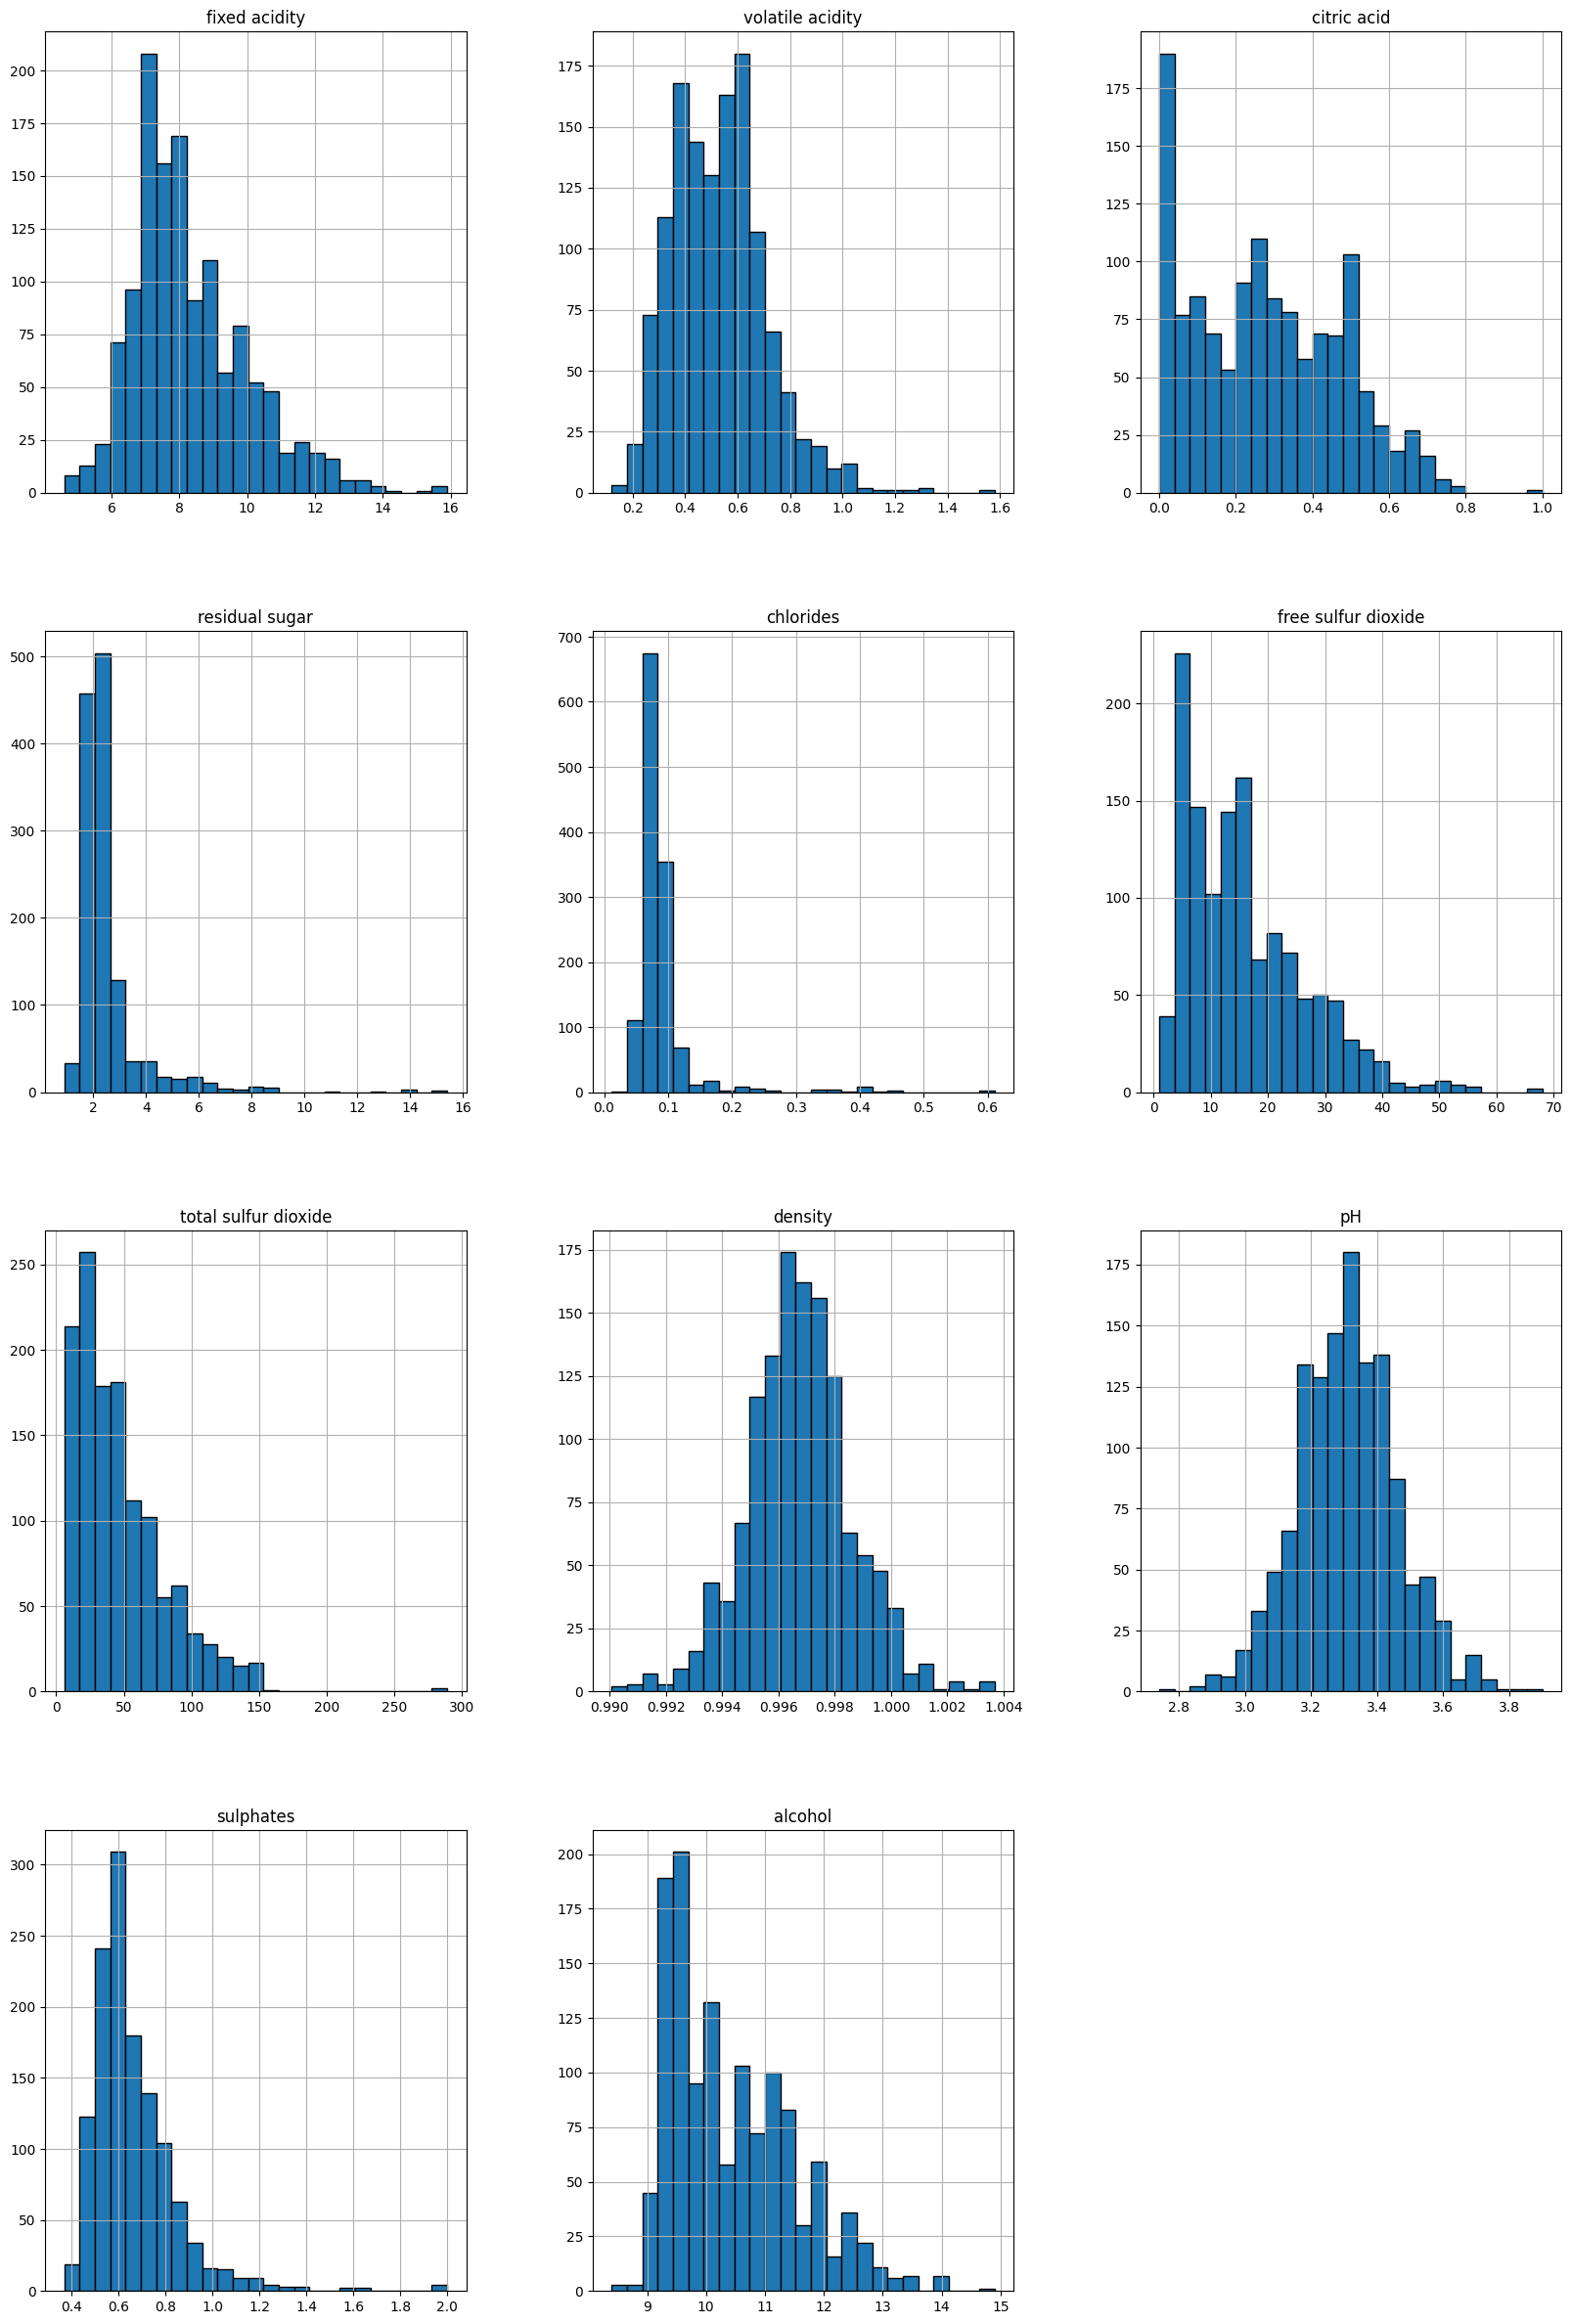

In [10]:
fig = X_train.hist(bins=25, edgecolor='black', figsize=(20, 30))

- Fixed acidity - the distribution is right-skewed, with most of the data centered around values ​​6–8.
- Volatile acidity - most values ​​are centered between 0.3 and 0.7.
- Citric acid - most values ​​are close to zero, but there is a long tail to the right.
- Residual sugar - very right-skewed - most wines have low sugar content (0–2 g/l).
- Chlorides - most values ​​are low (0.02–0.1), but there are a few exceptions.
- Free sulfur dioxide - most values ​​are below 30 mg/l.
- Total sulfur dioxide - the distribution is strongly right-skewed, with most wines containing less than 100 mg/l.
- Density - the distribution is symmetrical, with a normal distribution of about 0.996.
- pH - nearly normal distribution, with mean values ​​~3.2–3.4.
- Sulphates - most values ​​are between 0.4 and 0.6.
- Alcohol - the distribution is right-skewed – most wines have 9–12% alcohol.
- Quality - categorical variable with the most common values ​​being 5, 6, and 7.


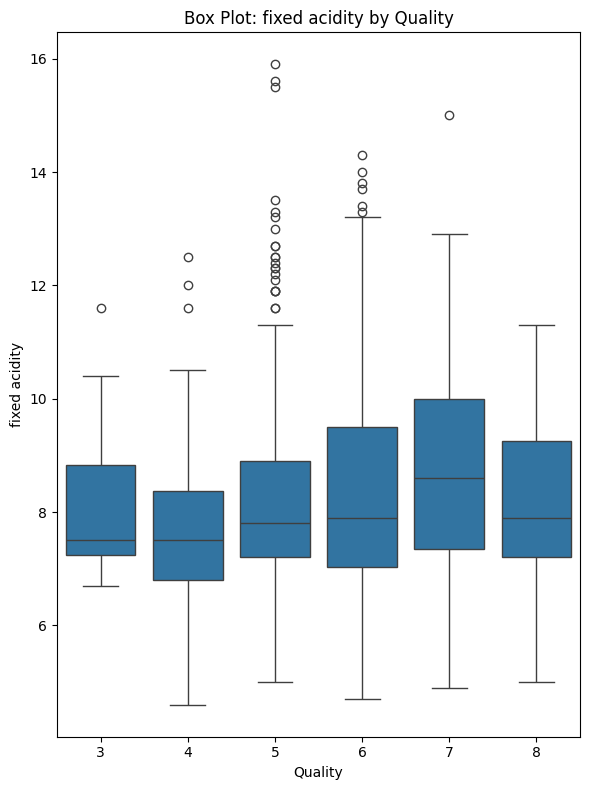

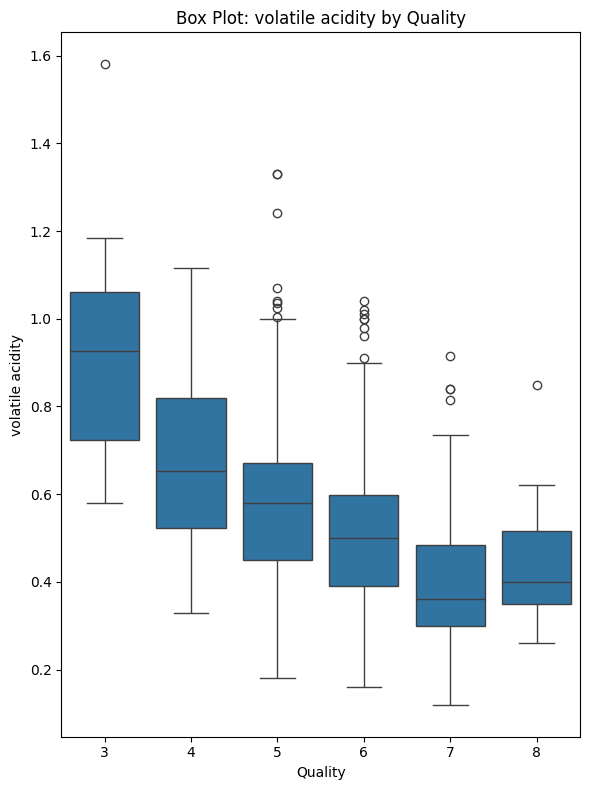

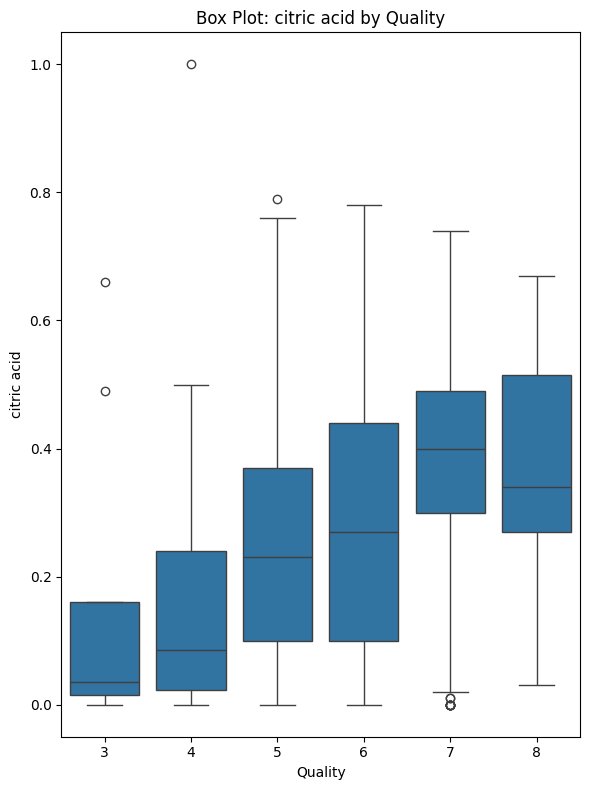

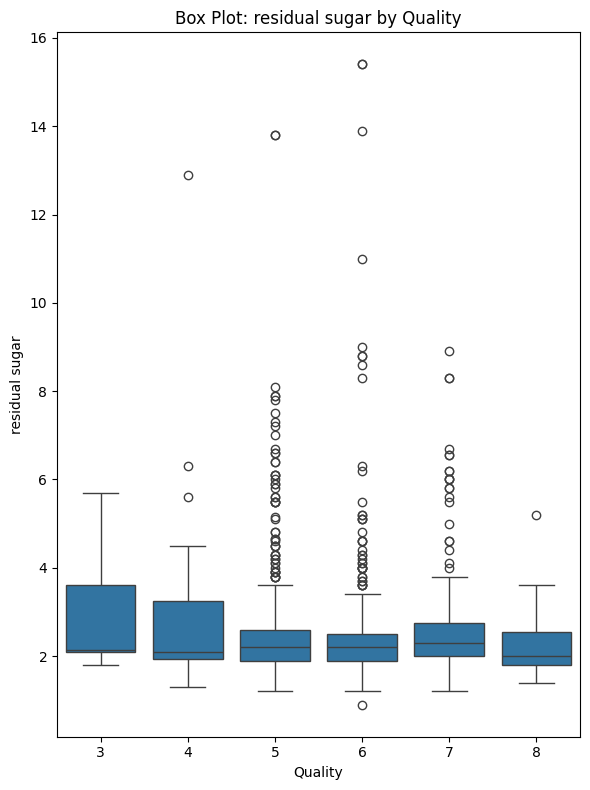

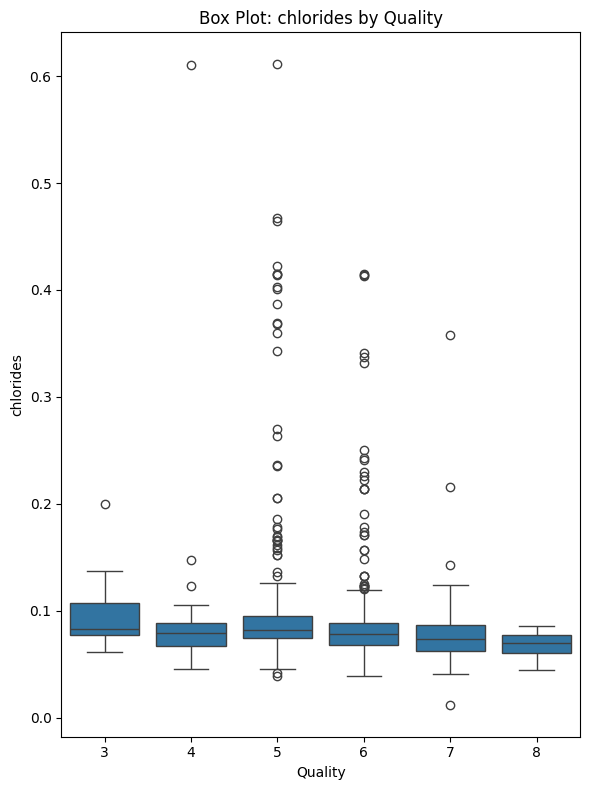

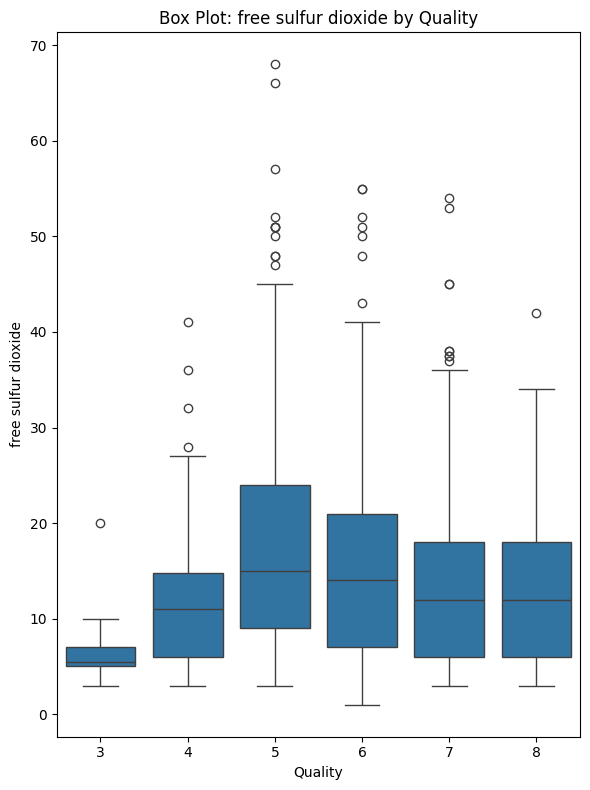

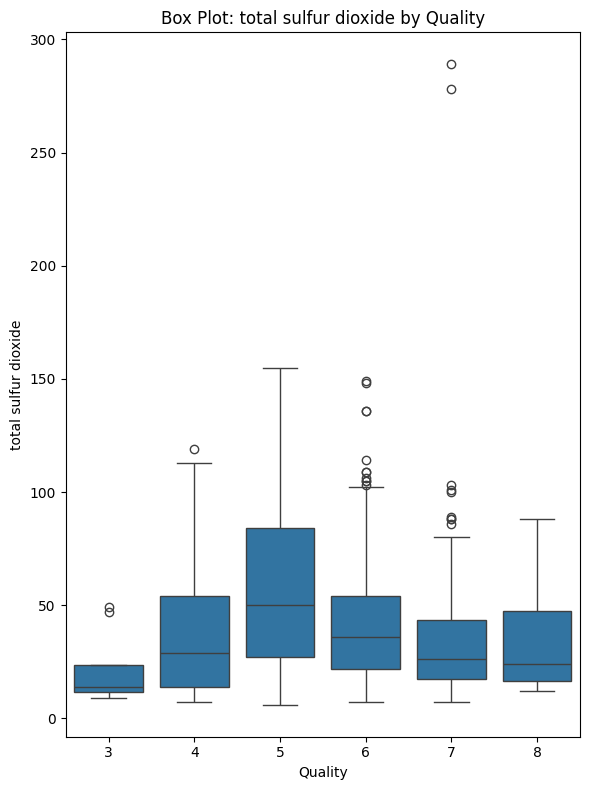

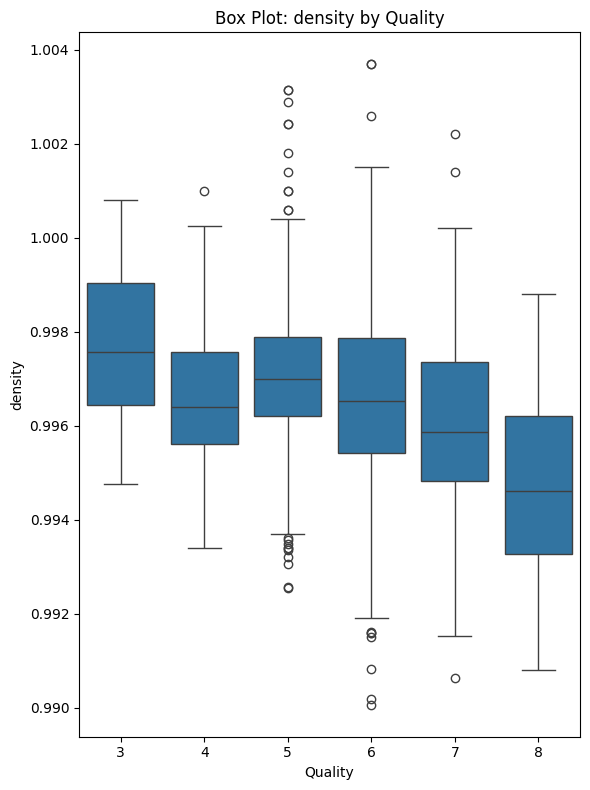

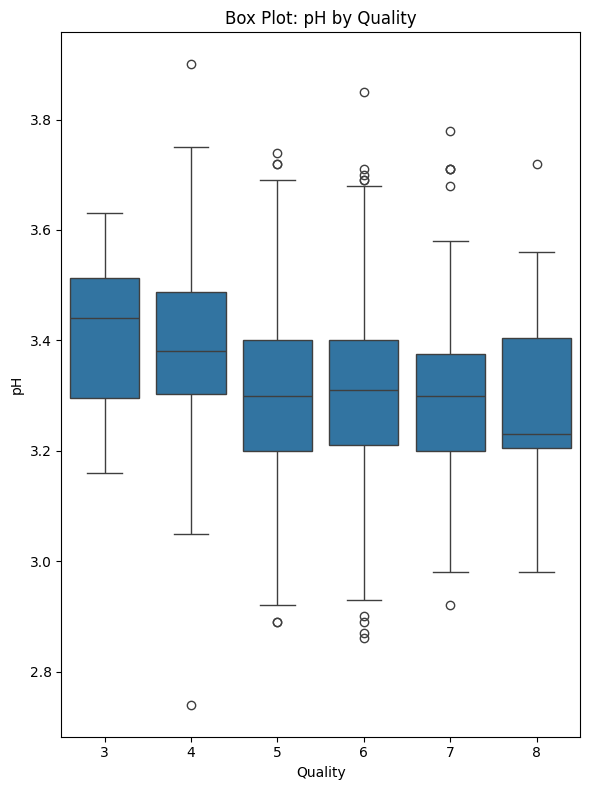

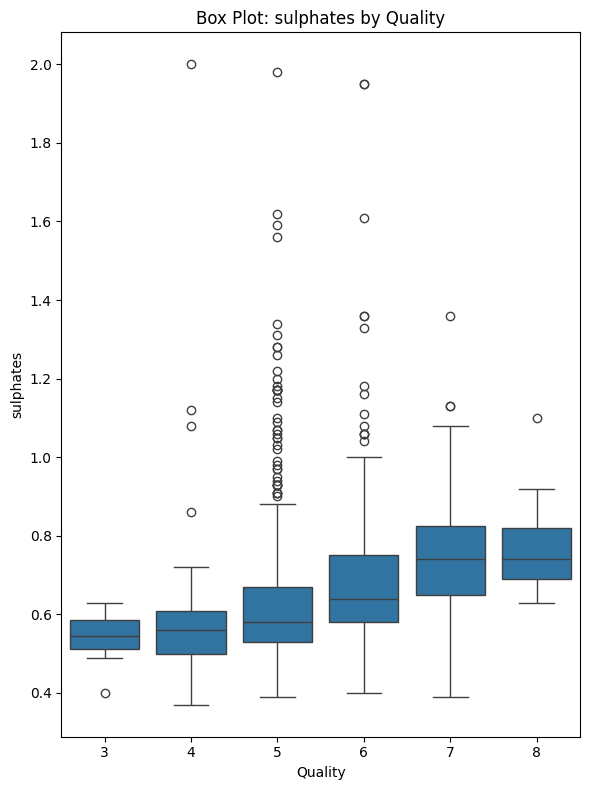

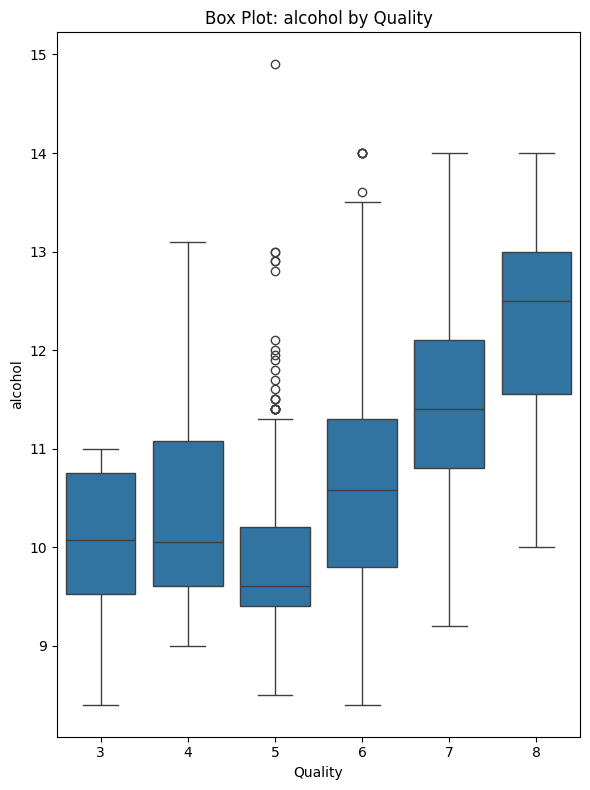

In [11]:

X_train_plot = X_train.copy()
X_train_plot['quality'] = y_train

features = [col for col in X_train_plot.columns if col != 'quality']

for col in features:
    plt.figure(figsize=(6, 8))
    sns.boxplot(data=X_train_plot, x='quality', y=col)
    plt.title(f'Box Plot: {col} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


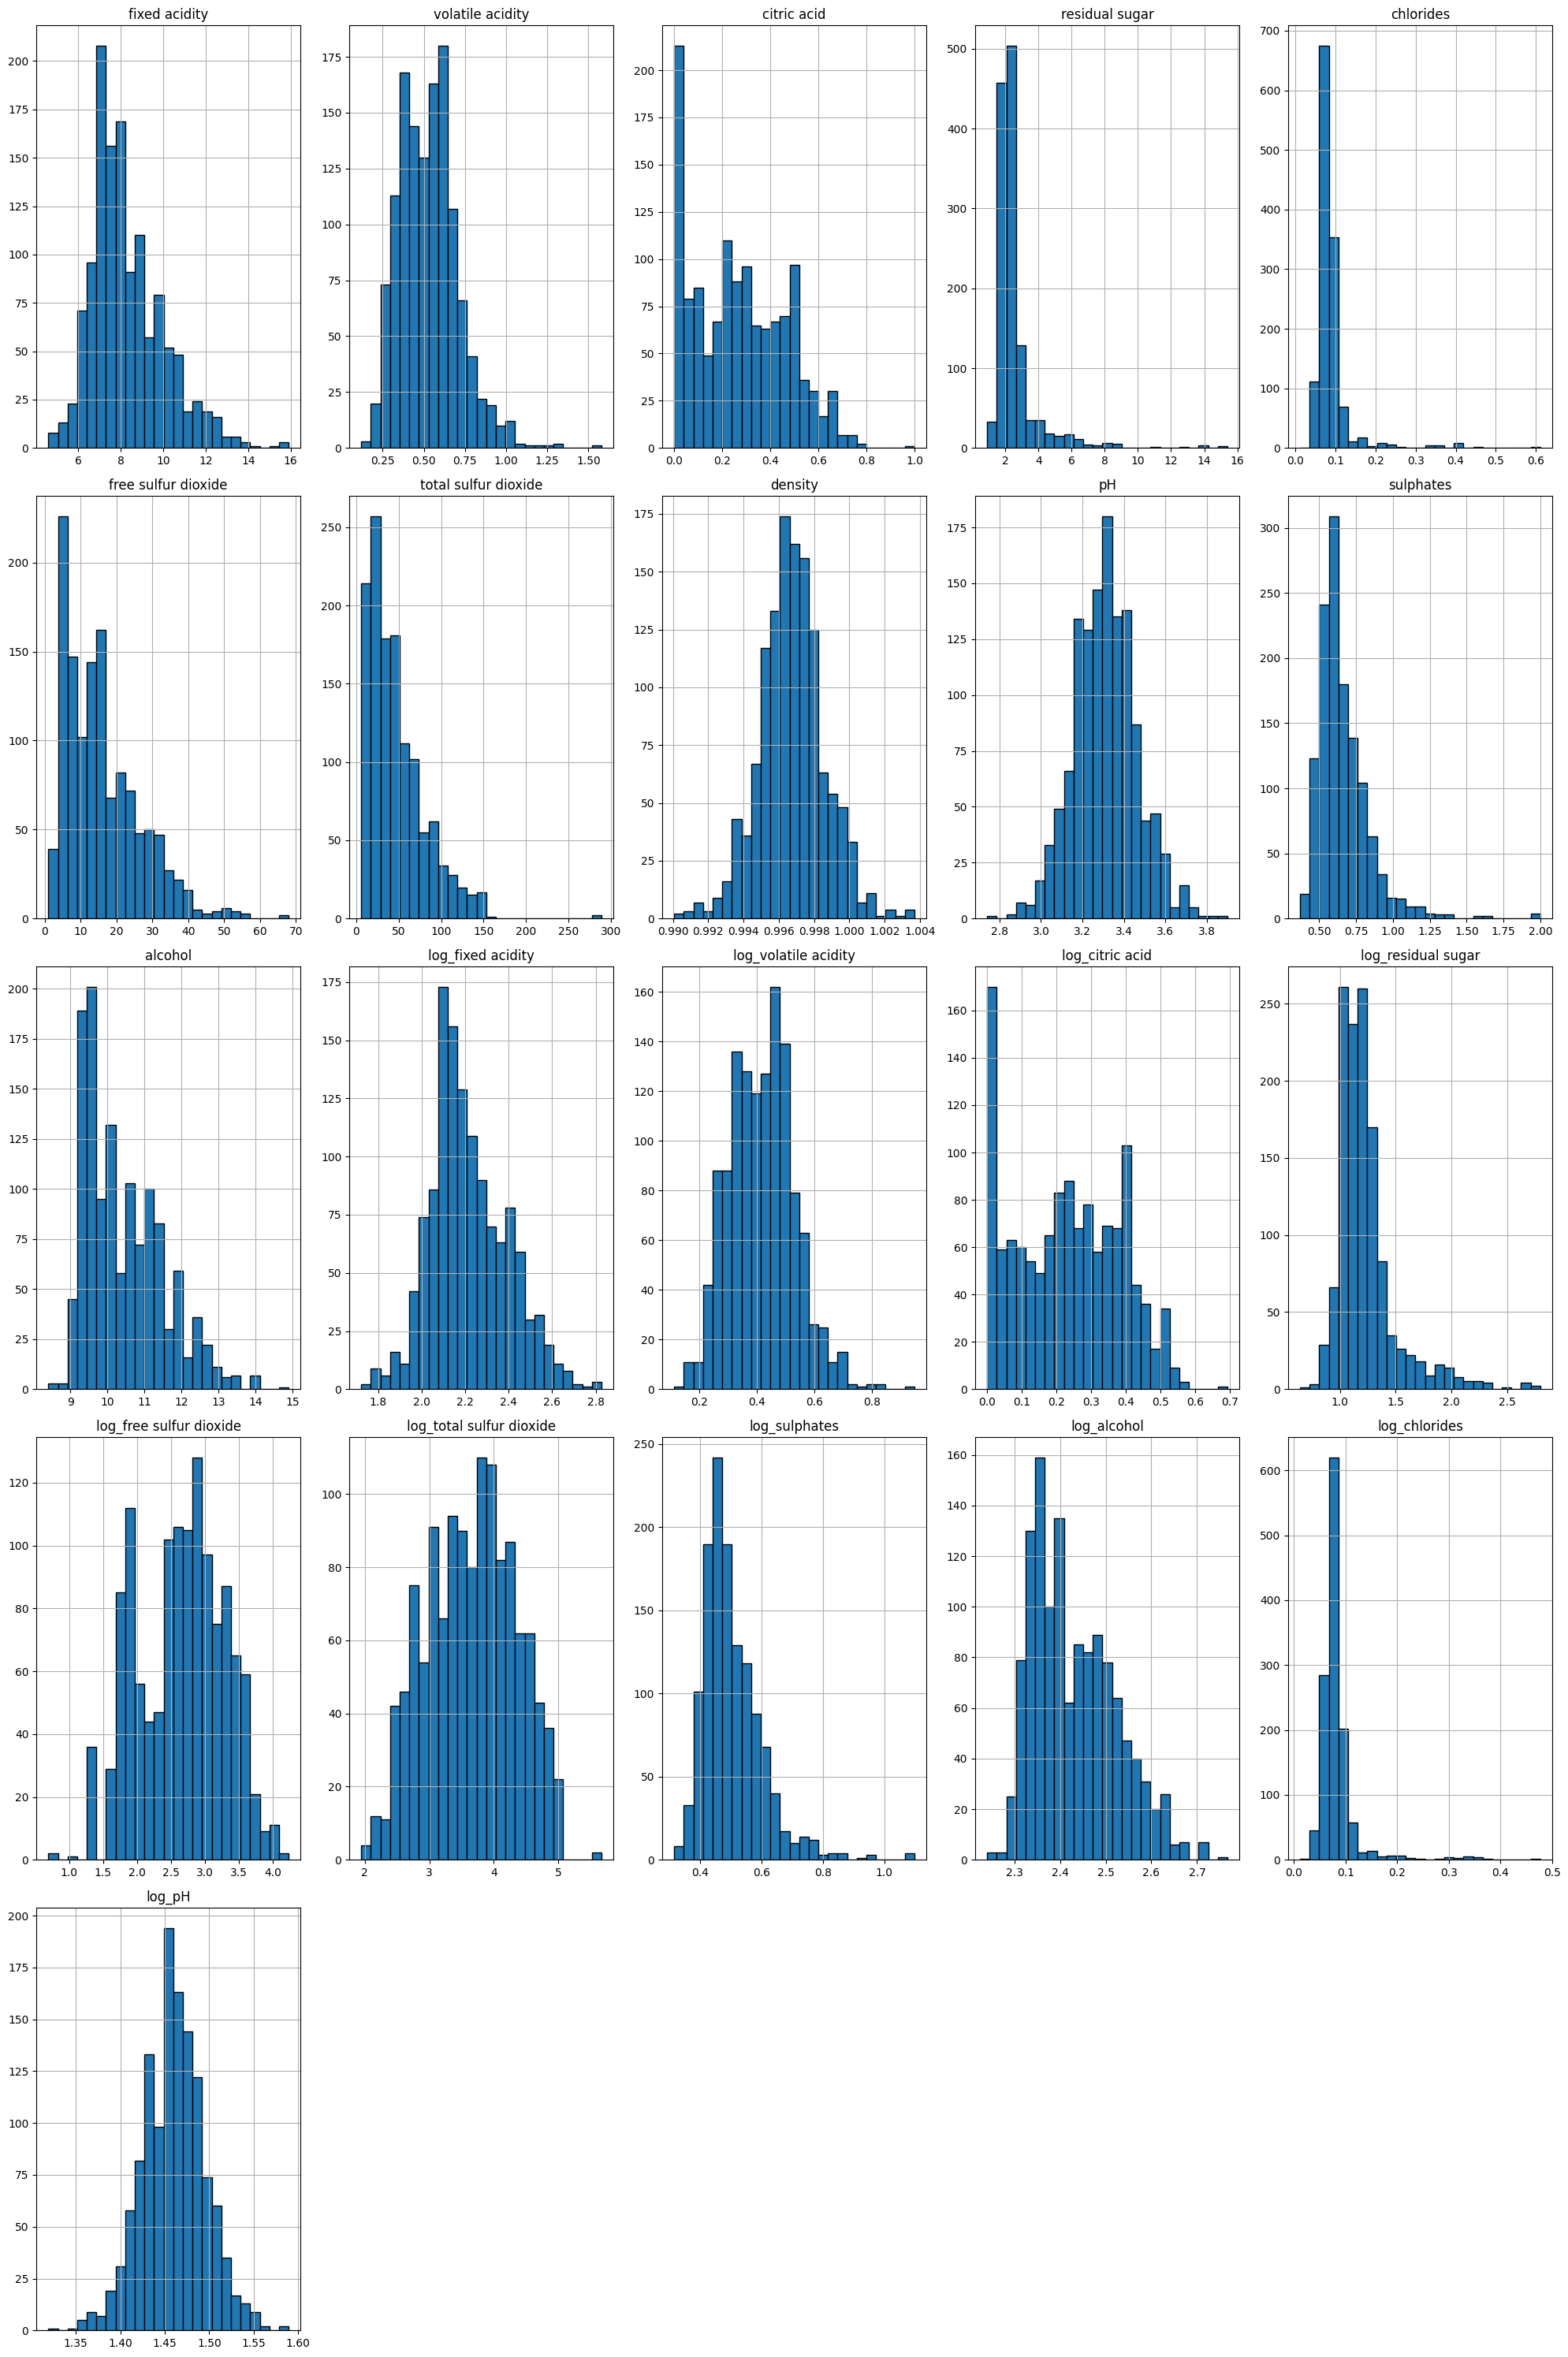

In [12]:
X_train_safe = X_train.copy()
X_train_safe[X_train_safe <= 0] = 1e-5 

X_train_safe['log_fixed acidity'] = np.log1p(X_train_safe['fixed acidity'] + 1e-6)
X_train_safe['log_volatile acidity'] = np.log1p(X_train_safe['volatile acidity'] + 1e-6)
X_train_safe['log_citric acid'] = np.log1p(X_train_safe['citric acid'] + 1e-6)
X_train_safe['log_residual sugar'] = np.log1p(X_train_safe['residual sugar'] + 1e-6)
X_train_safe['log_free sulfur dioxide'] = np.log1p(X_train_safe['free sulfur dioxide'] + 1e-6)
X_train_safe['log_total sulfur dioxide'] = np.log1p(X_train_safe['total sulfur dioxide'] + 1e-6)
X_train_safe['log_sulphates'] = np.log1p(X_train_safe['sulphates'] + 1e-6)
X_train_safe['log_alcohol'] = np.log1p(X_train_safe['alcohol'] + 1e-6)
X_train_safe['log_chlorides'] = np.log1p(X_train_safe['chlorides'] + 1e-6)
X_train_safe['log_pH'] = np.log1p(X_train_safe['pH'] + 1e-6)

fig = X_train_safe.hist(bins=25, edgecolor='black', figsize=(20, 30))
plt.tight_layout()
plt.show()

## Checking for multicollinearity.

In [13]:
X_vif = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                 feature           VIF
0                  const  1.833362e+06
1          fixed acidity  7.694088e+00
2       volatile acidity  1.766461e+00
3            citric acid  3.119300e+00
4         residual sugar  1.709049e+00
5              chlorides  1.555279e+00
6    free sulfur dioxide  1.902958e+00
7   total sulfur dioxide  2.193570e+00
8                density  6.538758e+00
9                     pH  3.362883e+00
10             sulphates  1.493378e+00
11               alcohol  3.282995e+00


Fixed acidity and density has strong multicollinearity.

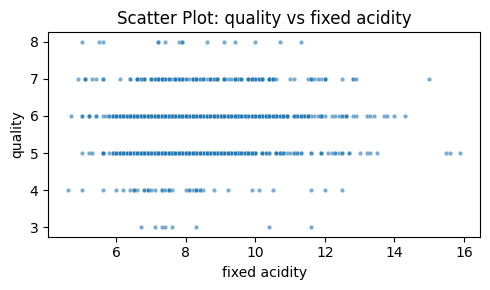

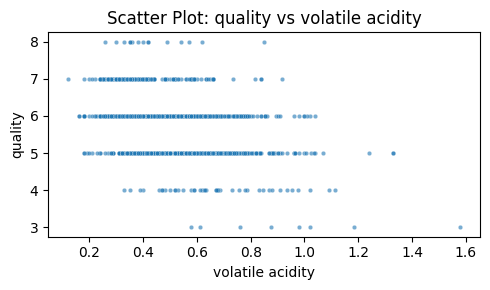

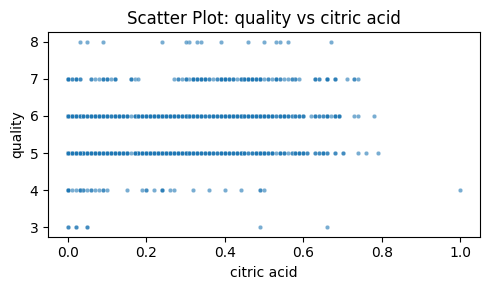

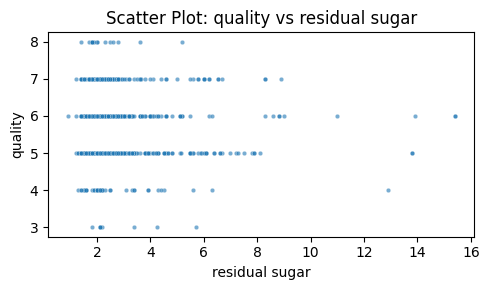

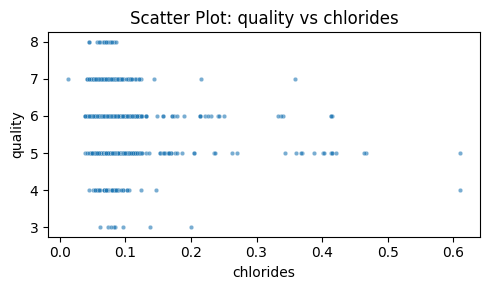

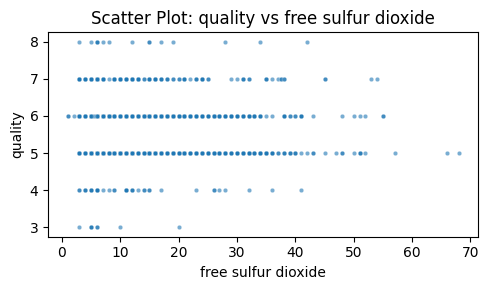

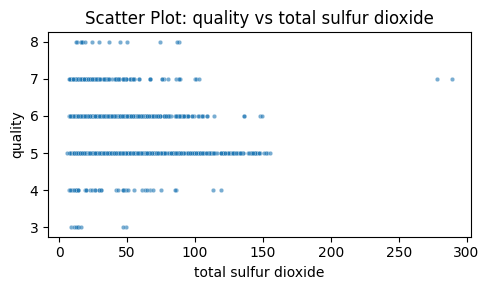

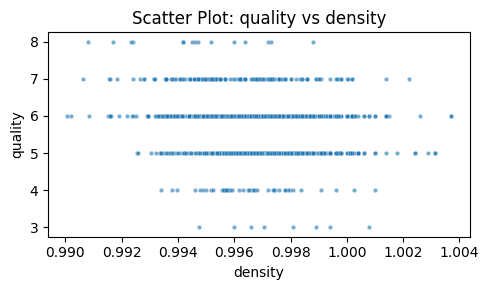

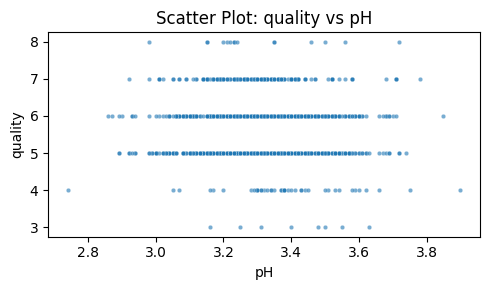

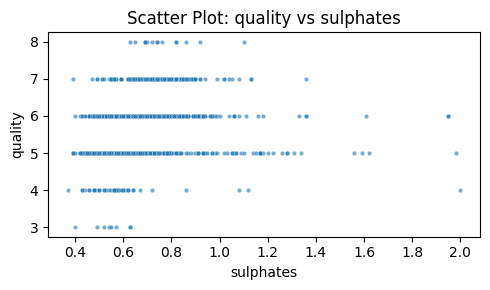

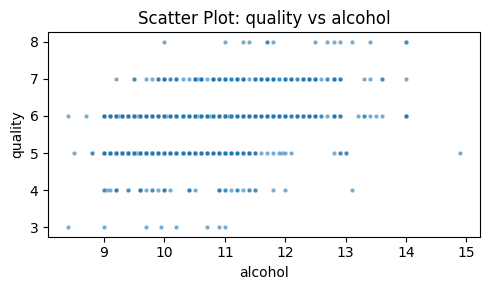

In [14]:
features = [col for col in X_train.columns if col != 'quality']

for col in features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=pd.concat([X_train, y_train], axis=1), x=col, y='quality', s=10, alpha=0.6)
    plt.title(f'Scatter Plot: quality vs {col}')
    plt.xlabel(col)
    plt.ylabel('quality')
    plt.tight_layout()
    plt.show()
    # ismesti

<Axes: >

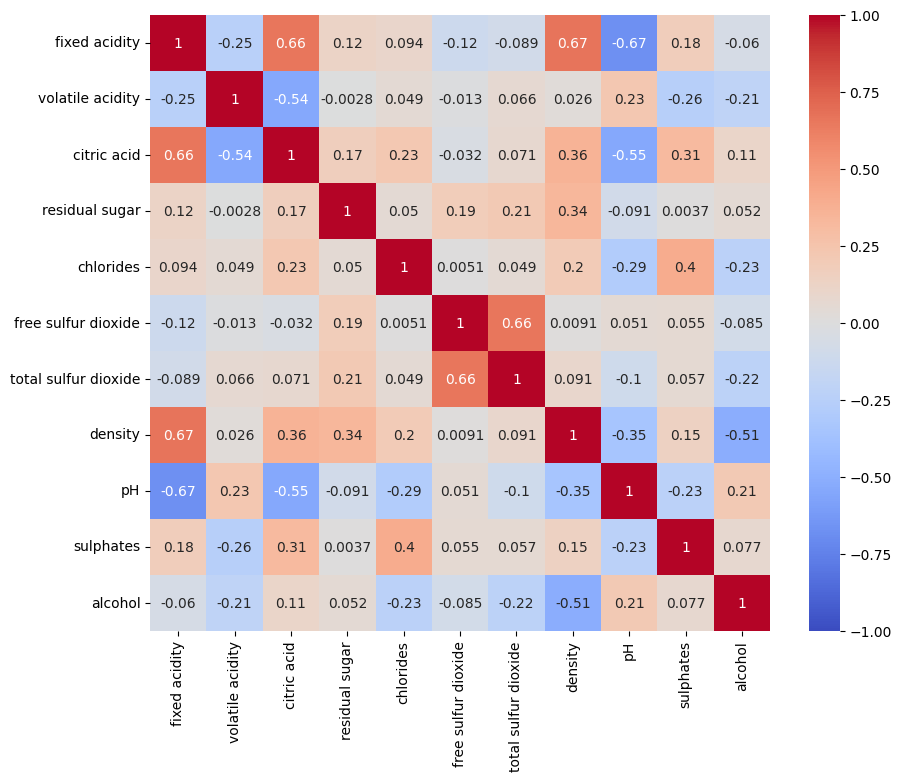

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)

The highest possitive correlation has fixed acidity and density - 0.67, fixed acidity and citric acid - 0.66, total sulfu dioxide and free sulfur dioxide - 0.66, the highest negative correlation has pH and fixid acidity - -0.67, pH and citric acid - -0.55, citric acid and volotile acidity - -0.54.

Checking for values equal or below 0.

In [16]:
(X_train <= 0).sum()

fixed acidity             0
volatile acidity          0
citric acid             107
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Eliminating value 0 and normalazing citric acid data.

In [17]:
X_train['citric acid'] = np.log1p(X_train['citric acid'] + 1e-6)  

Eliminating 0 and normalazing all columns.

In [18]:

X_train['log_fixed acidity'] = np.log1p(X_train['fixed acidity'] + 1e-6)
X_train['log_volatile acidity'] = np.log1p(X_train['volatile acidity'] + 1e-6)
X_train['log_citric acid'] = np.log1p(X_train['citric acid'] + 1e-6)
X_train['log_residual sugar'] = np.log1p(X_train['residual sugar'] + 1e-6)
X_train['log_free sulfur dioxide'] = np.log1p(X_train['free sulfur dioxide'] + 1e-6)
X_train['log_total sulfur dioxide'] = np.log1p(X_train['total sulfur dioxide'] + 1e-6)
X_train['log_sulphates'] = np.log1p(X_train['sulphates'] + 1e-6)
X_train['log_alcohol'] = np.log1p(X_train['alcohol'] + 1e-6)
X_train['log_chlorides'] = np.log1p(X_train['chlorides'] + 1e-6)
X_train['log_density'] = np.log1p(X_train['density'] + 1e-6)
X_train['log_pH'] = np.log1p(X_train['pH'] + 1e-6)


In [19]:
(X_train <= 0).sum()

fixed acidity               0
volatile acidity            0
citric acid                 0
residual sugar              0
chlorides                   0
free sulfur dioxide         0
total sulfur dioxide        0
density                     0
pH                          0
sulphates                   0
alcohol                     0
log_fixed acidity           0
log_volatile acidity        0
log_citric acid             0
log_residual sugar          0
log_free sulfur dioxide     0
log_total sulfur dioxide    0
log_sulphates               0
log_alcohol                 0
log_chlorides               0
log_density                 0
log_pH                      0
dtype: int64

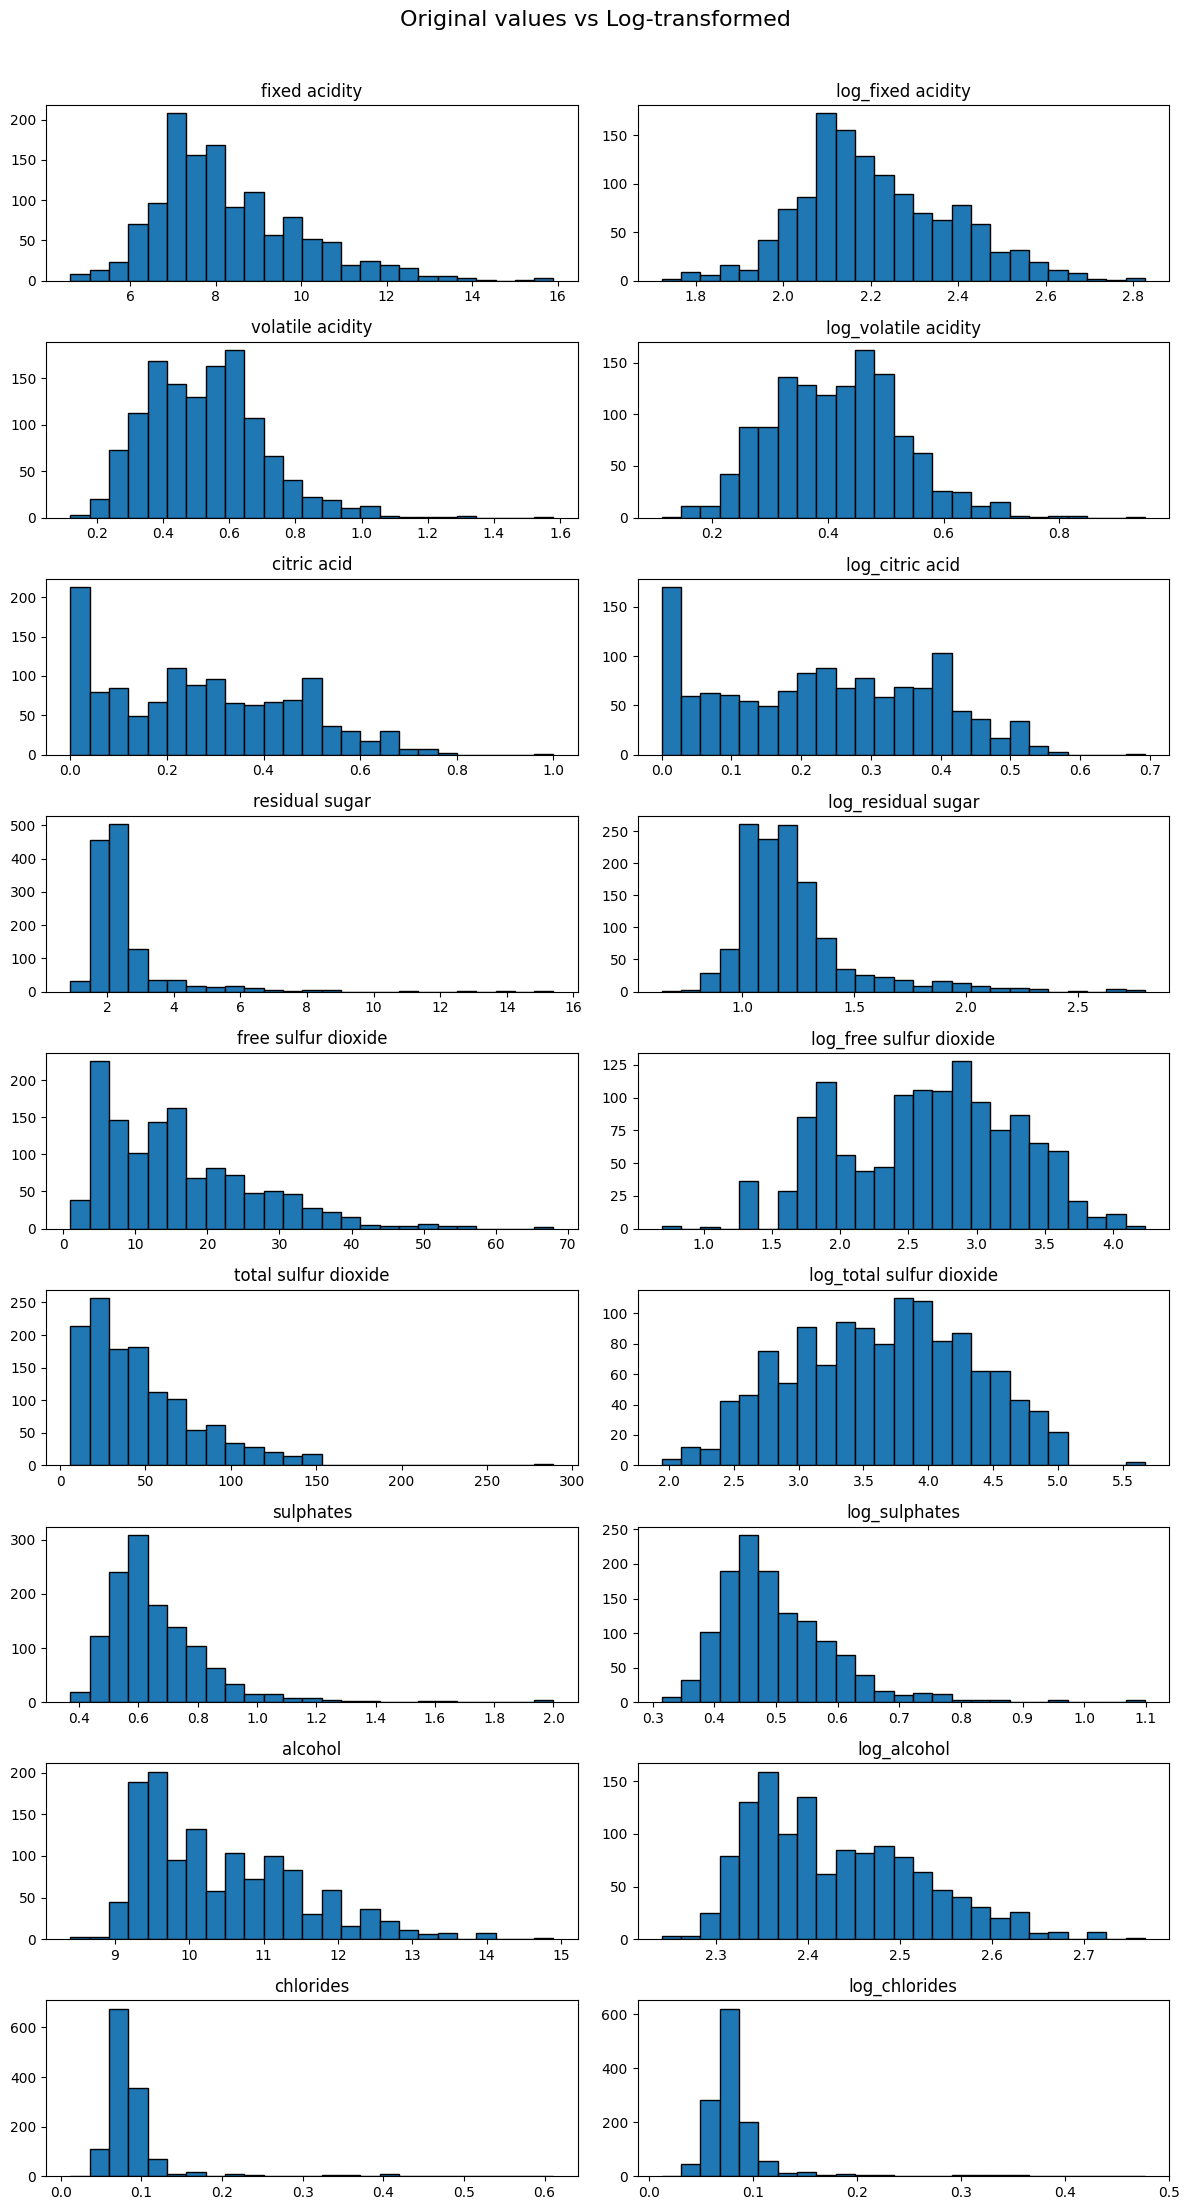

In [20]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',
    'alcohol', 'chlorides'
]


fig, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(12, len(features) * 2.5))
fig.suptitle('Original values vs Log-transformed', fontsize=16)
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(features):
    log_col = f'log_{col}'
    
    axs[i, 0].hist(X_train_safe[col].dropna(), bins=25, edgecolor='black')
    axs[i, 0].set_title(f'{col}')
    
    axs[i, 1].hist(X_train_safe[log_col].dropna(), bins=25, edgecolor='black')
    axs[i, 1].set_title(f'log_{col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Standart scaling will be performed to balance data for optimization and better performace of the model.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [22]:
print(df.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [23]:
X_train['log_pH_sq'] = np.sqrt(X_train['log_pH'] + 1e-6)

In [24]:
X_train['log_pH_cubed'] = X_train['log_pH'] ** 3

In [25]:
def box_tidwell_test_mixed(data, y_train_col, features_log, features_orig):
    df = data.copy()
    valid_log = []
    valid_orig = []
    
    for col in features_log:

        if (df[col] <= 0).any():
            print(f"[SKIP LOG] {col} has >=0 values.")
            continue
        df[f'{col}_log_inter'] = df[col] * np.log(df[col])
        valid_log.append(col)

    for col in features_orig:
        if (df[col] <= 0).any():
            print(f"[SKIP ORIG] {col} has >=0 values.")
            continue
        df[f'{col}_log_inter'] = df[col] * np.log(df[col])
        valid_orig.append(col)

    X_cols = valid_log + [f'{col}_log_inter' for col in valid_log] + \
             valid_orig + [f'{col}_log_inter' for col in valid_orig]

    X = sm.add_constant(df[X_cols])
    y = df[y_train_col]
    
    model = sm.Logit(y, X).fit(disp=False)

    print("\n Box-Tidwell test ")
    print("Variable              p value (x * log(x))     Interpretation")
    print("-" * 60)
    
    for col in valid_log + valid_orig:
        inter_term = f'{col}_log_inter'
        p_val = model.pvalues.get(inter_term, None)
        if p_val is None:
            continue
        conclusion = "Not linear" if p_val < 0.05 else "Linear"
        print(f"{col:25s} {p_val:>15.4f}     {conclusion}")


In [26]:
features_log = ['log_pH_cubed', 'log_volatile acidity', 'log_free sulfur dioxide', 'total sulfur dioxide',]
features_orig = ['alcohol']

box_tidwell_test_mixed(data=X_train.assign(quality_binary=(y_train >= 6).astype(int)),
                       y_train_col='quality_binary',
                       features_log=features_log,
                       features_orig=features_orig)



 Box-Tidwell test 
Variable              p value (x * log(x))     Interpretation
------------------------------------------------------------
log_pH_cubed                       0.0572     Linear
log_volatile acidity               0.8358     Linear
log_free sulfur dioxide            0.4982     Linear
total sulfur dioxide               0.6413     Linear
alcohol                            0.5808     Linear


The Box-Tidwell test indicates that all selected parameters of Y depend linearly on X.


# Modeling

## Assumptions
Assumption 1: The Response Variable is Binary. Quality is devided in to two groups: high quality and not high quality. <br>
Assumption 2: The Observations are Independent. Correleation matrix represents, that observations are indipendant. <br>
Assumption 3: There is No Multicollinearity Among Explanatory Variables. Multicollinearity checked using VIF. All selected parameters has less than 5 values. <br>
Assumption 4: There are No Extreme Outliers. There are a wide range of values, but since these are parameters for young wine they are acceptable. <br>
Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable. Tested by Box-Tidwell test, all variables perform linear relationship. <br> 
Assumption 6: The Sample Size is Sufficiently Large. There are two groups with: 855 and 744 samples.

## Creating training model

The logistic regression model were  choosem, because I reformulated the wine quality problem as a binary classification task – for example, distinguishing high-quality wines from low-quality ones.

Selected parameters for model: log_volatile acidity, log_free sulfur dioxide, log_total sulfur dioxide, sulphates and alcohol. There parameters were selected due to multicollinearity check results and P value. Logatritmic transformaions were applied.

Quality will be divided into two categories: high quality and low quality. Wines with a quality score of 6 or higher will be considered high quality, while those with a score below 6 will be considered low quality. This division will result in two groups of approximately equal size.

fixed acidity               0
volatile acidity            0
citric acid                 0
residual sugar              0
chlorides                   0
free sulfur dioxide         0
total sulfur dioxide        0
density                     0
pH                          0
sulphates                   0
alcohol                     0
log_fixed acidity           0
log_volatile acidity        0
log_citric acid             0
log_residual sugar          0
log_free sulfur dioxide     0
log_total sulfur dioxide    0
log_sulphates               0
log_alcohol                 0
log_chlorides               0
dtype: int64

In [27]:
y_binary = (y_train >= 6).astype(int)

X = X_train[['log_volatile acidity',
              'log_free sulfur dioxide', 'total sulfur dioxide',
             'log_pH_cubed', 'alcohol']]

X_const = sm.add_constant(X)

model = sm.Logit(y_binary, X_const)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.524551
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1273
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.2406
Time:                        14:20:01   Log-Likelihood:                -670.90
converged:                       True   LL-Null:                       -883.44
Covariance Type:            nonrobust   LLR p-value:                 1.169e-89
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.7360      1.119     -5.126      0.000      -7.929   

Pseudo R-squared: 0.2406 — indicates moderate model fit; it shows how much variation the model explains (not directly comparable to linear regression R²).<br>
Likelihood Ratio (LR) test p-value: 1.169e-89 — the model is highly statistically significant compared to the null model (p < 0.001).<br>
All variables have p-values < 0.05 (mostly 0.000), so they are all statistically significant predictors of quality.<br>


In [28]:
y_train_pred_prob = result.predict(X_const)

y_pred = (y_train_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_binary, y_pred))

print(confusion_matrix(y_binary, y_pred))

print("AUC:", roc_auc_score(y_binary, y_train_pred_prob))



Accuracy: 0.7490226739640344
[[442 153]
 [168 516]]
AUC: 0.815595360951398


Accuracy: 0.7490226739640344 means that about 75% of the total predictions were correct.<br>
[[442 153] [168 516]] means that model predictied True Negatives - 442, False Positives - 153, False Negatives - 168, True Positives - 516.<br>
AUC of 0.815595360951398 means the model has a good ability to distinguish between the two classes.

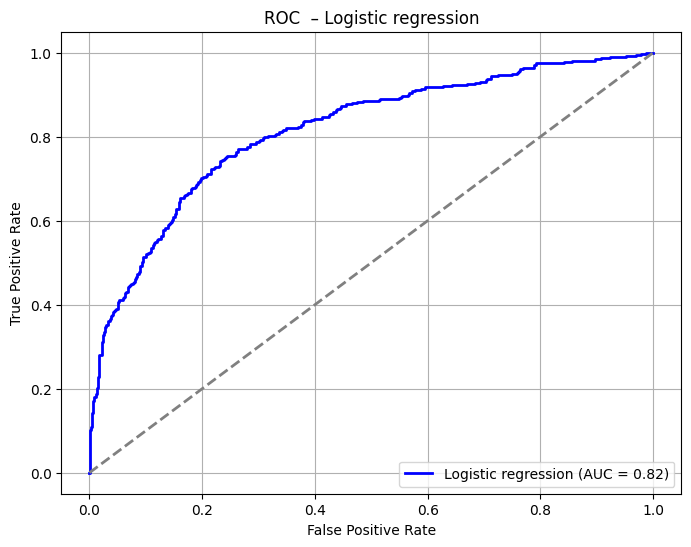

In [29]:
y_train_pred_proba = result.predict(X_const)

fpr, tpr, thresholds = roc_curve(y_binary, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC  – Logistic regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Blue Line: This is your model's Receiver Operating Characteristic (ROC) curve, which shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) across different threshold values.<br>
Gray Dashed Line: Represents a random classifier (AUC = 0.5). 

In [30]:
(X_train <= 0).sum()

fixed acidity               0
volatile acidity            0
citric acid                 0
residual sugar              0
chlorides                   0
free sulfur dioxide         0
total sulfur dioxide        0
density                     0
pH                          0
sulphates                   0
alcohol                     0
log_fixed acidity           0
log_volatile acidity        0
log_citric acid             0
log_residual sugar          0
log_free sulfur dioxide     0
log_total sulfur dioxide    0
log_sulphates               0
log_alcohol                 0
log_chlorides               0
log_density                 0
log_pH                      0
log_pH_sq                   0
log_pH_cubed                0
dtype: int64

## Test model data

In [31]:
(X_holdout <= 0).sum()

fixed acidity            0
volatile acidity         0
citric acid             25
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
dtype: int64

In [32]:
X_holdout['citric acid'] = np.log1p(X_holdout['citric acid'] + 1e-6)

In [33]:
print(X_holdout['citric acid'].isna().sum())
print(len(X_holdout['citric acid']))

0
320


In [34]:
median_citric = X_train['citric acid'].median()
X_holdout['citric acid'] = X_holdout['citric acid'].fillna(median_citric)


In [35]:
X_holdout.isna().sum().sum()

np.int64(0)

In [36]:
(X_holdout <= 0).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [37]:
X_holdout[X_holdout <= 0] = 1e-5

X_holdout['log_fixed acidity'] = np.log1p(X_holdout['fixed acidity'] + 1e-6)
X_holdout['log_volatile acidity'] = np.log1p(X_holdout['volatile acidity'] + 1e-6)
X_holdout['log_citric acid'] = np.log1p(X_holdout['citric acid'] + 1e-6)
X_holdout['log_residual sugar'] = np.log1p(X_holdout['residual sugar'] + 1e-6)
X_holdout['log_free sulfur dioxide'] = np.log1p(X_holdout['free sulfur dioxide'] + 1e-6)
X_holdout['log_total sulfur dioxide'] = np.log1p(X_holdout['total sulfur dioxide'] + 1e-6)
X_holdout['log_sulphates'] = np.log1p(X_holdout['sulphates'] + 1e-6)
X_holdout['log_alcohol'] = np.log1p(X_holdout['alcohol'] + 1e-6)
X_holdout['log_chlorides'] = np.log1p(X_holdout['chlorides'] + 1e-6)
X_holdout['log_pH'] = np.log1p(X_holdout['pH'] + 1e-6)

In [38]:
X_holdout['log_pH_sq'] = np.sqrt(X_holdout['log_pH'] + 1e-6)
X_holdout['log_pH_cubed'] = X_holdout['log_pH'] ** 3

In [39]:
(X_holdout <= 0).sum()
X_holdout.isna().sum().sum()

np.int64(0)

In [40]:
(X_holdout <= 0).sum()


fixed acidity               0
volatile acidity            0
citric acid                 0
residual sugar              0
chlorides                   0
free sulfur dioxide         0
total sulfur dioxide        0
density                     0
pH                          0
sulphates                   0
alcohol                     0
log_fixed acidity           0
log_volatile acidity        0
log_citric acid             0
log_residual sugar          0
log_free sulfur dioxide     0
log_total sulfur dioxide    0
log_sulphates               0
log_alcohol                 0
log_chlorides               0
log_pH                      0
log_pH_sq                   0
log_pH_cubed                0
dtype: int64

In [41]:
X_holdout.isna().sum().sum()

np.int64(0)

In [42]:
X_holdout['citric acid'] = X_holdout['citric acid'].fillna(X_holdout['citric acid'].median())
X_holdout['log_citric acid'] = X_holdout['citric acid'].fillna(X_holdout['log_citric acid'].median())

In [43]:
y_holdout_binary = (y_holdout >= 6).astype(int)

In [44]:
for col in ['log_volatile acidity',
              'log_free sulfur dioxide', 'total sulfur dioxide',
             'log_pH_cubed', 'alcohol']:
    X_train['log_' + col] = np.log1p(X_train[col] + 1e-6)
    X_holdout['log_' + col] = np.log1p(X_holdout[col] + 1e-6)


In [45]:
columns_for_model = ['log_volatile acidity',
              'log_free sulfur dioxide', 'total sulfur dioxide',
             'log_pH_cubed', 'alcohol']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_for_model])
X_holdout_scaled = scaler.transform(X_holdout[columns_for_model])


In [46]:
X_holdout_model = X_holdout[['log_volatile acidity',
              'log_free sulfur dioxide', 'total sulfur dioxide',
             'log_pH_cubed', 'alcohol']]
X_holdout_const = sm.add_constant(X_holdout_model)
holdout_binary = (y_holdout >= 6).astype(int)

y_pred_proba = result.predict(X_holdout_const)
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Accuracy:", accuracy_score(holdout_binary, y_pred))
print("Confusion matrix:\n", confusion_matrix(holdout_binary, y_pred))
print("AUC:", roc_auc_score(holdout_binary, y_pred_proba))


Accuracy: 0.734375
Confusion matrix:
 [[110  39]
 [ 46 125]]
AUC: 0.7876682758350013


In [47]:
threshold = 0.5
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print("Custom threshold accuracy:", accuracy_score(holdout_binary, y_pred_custom))
print("Confusion matrix:\n", confusion_matrix(holdout_binary, y_pred_custom))
print("AUC:", roc_auc_score(holdout_binary, y_pred_proba))

Custom threshold accuracy: 0.734375
Confusion matrix:
 [[110  39]
 [ 46 125]]
AUC: 0.7876682758350013


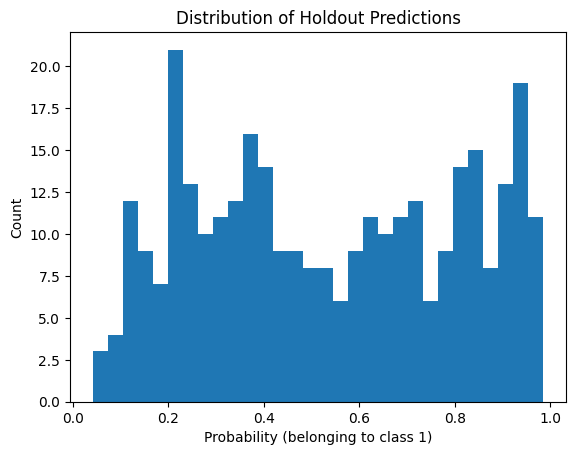

In [48]:
plt.hist(y_pred_proba, bins=30)
plt.title("Distribution of Holdout Predictions")
plt.xlabel("Probability (belonging to class 1)")
plt.ylabel("Count")
plt.show()


In [49]:
Xh = X_holdout[['log_volatile acidity',
              'log_free sulfur dioxide', 'total sulfur dioxide',
             'log_pH_cubed', 'alcohol']]

In [50]:
X_clean = Xh.replace([np.inf, -np.inf], np.nan).dropna()

In [51]:
X_clean.head()

,log_volatile acidity,log_free sulfur dioxide,total sulfur dioxide,log_pH_cubed,alcohol
963,0.239018,3.044522,27.0,2.882134,11.2
475,0.518794,1.791760,28.0,2.867500,10.2
1,0.631272,3.258097,67.0,2.955512,9.8
329,0.378437,2.079442,15.0,2.926118,9.5
149,0.336473,2.484907,43.0,3.447893,10.5


In [52]:
y_binary = (y_holdout >= 6).astype(int)
y_clean = y_binary[X_clean.index]  


In [53]:
y_pred_prob = result.predict(sm.add_constant(X_clean))

y_pred = (y_pred_prob >= 0.5).astype(int)


In [54]:
cm = confusion_matrix(y_clean, y_pred)
accuracy = accuracy_score(y_clean, y_pred)

print("Confusion matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")


Confusion matrix:
[[110  39]
 [ 46 125]]
Accuracy: 0.7344


[[110  39]  [ 46 125]] means that model predictied True Negatives - 110, False Positives - 39, False Negatives - 46, True Positives - 125.<br>
Accuracy of 0.7344 means the model corectly clasified 235 from 320.

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = 125 / (125 + 39)
recall = 125 / (125 + 46)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7621951219512195
Recall: 0.7309941520467836
F1-score: 0.746268656716418


Precision: 0.7622. Of all instances predicted as positive, 76.22% were actually positive.<br>
Recall (Sensitivity): 0.7310. Of all actual positive instances, 73.10% were correctly identified.<br>
F1-score: 0.7463. The harmonic mean of precision and recall, indicating a good balance between the two.

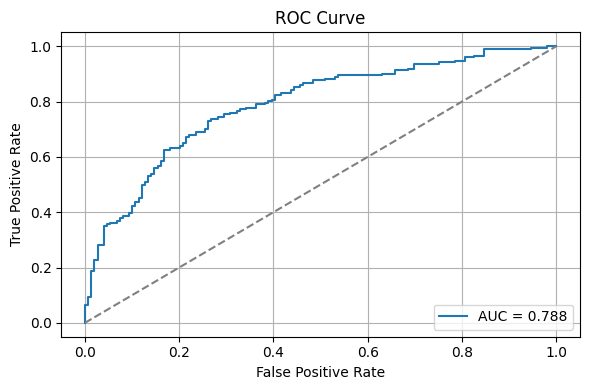

In [56]:
fpr, tpr, thresholds = roc_curve(y_clean, y_pred_prob)
auc = roc_auc_score(y_clean, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Blue Line: This is your model's Receiver Operating Characteristic (ROC) curve, which shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) across different threshold values.<br>
Gray Dashed Line: Represents a random classifier (AUC = 0.5). 

### Coeficients

Pseudo R-squ.: 0.2362. Model explains 23,62 % of all data variability (variance) of the data.<br>
Coeficient: shows how much the regression variable (X) affects the dependent variable (Y). <br>
In here y - vine quality, x - following variables:
- const -7.1301 
- log_volatile acidity -4.6142
- log_free sulfur dioxide 0.5412 
- log_total sulfur dioxide -0.8363
- alcohol 0.9362<br>
- log_pH_cubed -1.0887  
For example: If alcohol increases by 1, quality increases by 0.9362.<br>

P>|z|: the value indicates whether the coefficient is statistically significant. In this project it was considered as significant when  p < 0.05. All selected variables are significant.<br>

[0.025 and 0.975]: 95% confidence interval limits – a range where the true coefficient is expected to lie, assuming the model assumptions hold (with a 95% probability). If the interval does not include zero, this usually means that the coefficient is statistically significant. <br>


## Hypotesis interpretation

Since the p-value for alcohol concentration is less than 0.05, we reject the null hypothesis. This provides sufficient evidence to conclude that alcohol concentration has a statistically significant positive effect on wine quality.

## Suggestions for improvments

- Include more/other parameters to the model.
- To test other models.